# 1. Data
This section covers data selection, distribution, and correlation analysis as per ReadMe requirement.

## 1.a Data Selection Approach
The dataset consists of academic performance records. For FIS modeling, 20 records per class (100 total) are sampled. For ANFIS, 10,000 records per class (50,000 total) are used.

## 1.b Data Distribution of the Employed Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- NUCLEAR DATA CLEANING ---
# 1. Read without header to see raw structure
df_raw = pd.read_excel('academicPerformanceData.xlsx', header=None)

# 2. Search for the real header row
header_idx = None
for i, row in df_raw.head(50).iterrows():
    row_str = row.astype(str).str.lower().to_list()
    if 'remarks' in row_str or 'x7' in row_str:
        header_idx = i
        break

if header_idx is None: header_idx = 0

# 3. Reload with correct header
df = pd.read_excel('academicPerformanceData.xlsx', header=header_idx)

# 4. Clean Column Names
df.columns = df.columns.astype(str).str.strip().str.lower()

# 5. Keep ONLY critical columns
expected_cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'remarks']
cols_to_keep = [c for c in expected_cols if c in df.columns]
df = df[cols_to_keep]

# 6. Force Numeric Coercion
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 7. Drop Garbage Rows
df.dropna(subset=['remarks'], inplace=True)
df.reset_index(drop=True, inplace=True)

print("Data Loaded & Cleaned.")
print(df.info())
print(df.head())

Data Loaded & Cleaned.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   x1       200000 non-null  int64
 1   x2       200000 non-null  int64
 2   x3       200000 non-null  int64
 3   x4       200000 non-null  int64
 4   x5       200000 non-null  int64
 5   x6       200000 non-null  int64
 6   x7       200000 non-null  int64
 7   remarks  200000 non-null  int64
dtypes: int64(8)
memory usage: 12.2 MB
None
   x1  x2  x3  x4  x5  x6  x7  remarks
0   0   1   1   6   8   4  35        3
1   0   0   4   5   2   6   0        1
2   0   0   8   9   3   7   0        1
3   0   0   9   0   9   8  25        3
4   0   0   4   6   6   7  30        3


## 1.b.iii Visualization of Data Distributions\nBoxplots and Violin plots showing feature spread across classes.

In [2]:
desc = df.describe().T
print(desc[['mean', 'std', 'min', '50%', 'max']])

              mean        std  min   50%   max
x1        5.000595   3.162367  0.0   5.0  10.0
x2        5.000405   3.160940  0.0   5.0  10.0
x3        5.006520   3.165040  0.0   5.0  10.0
x4        5.000875   3.162321  0.0   5.0  10.0
x5        5.000570   3.162349  0.0   5.0  10.0
x6        4.999495   3.162677  0.0   5.0  10.0
x7       19.995310  11.830956  0.0  20.0  40.0
remarks   2.626265   1.282773  1.0   3.0   5.0


## 2. Class Distribution

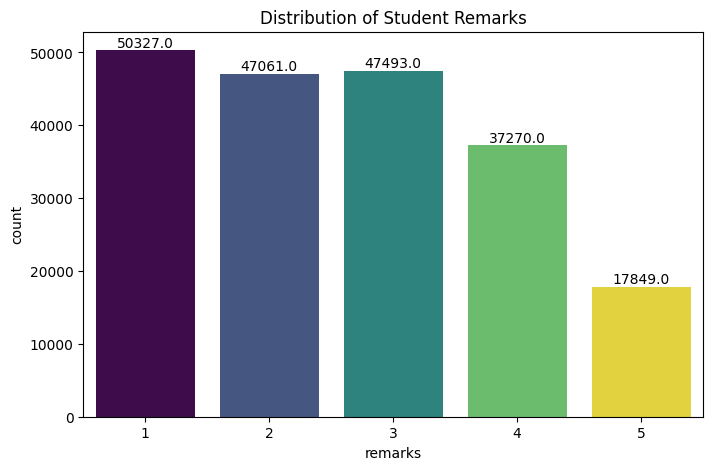

In [3]:
plt.figure(figsize=(8, 5))
if 'remarks' in df.columns:
    ax = sns.countplot(x='remarks', data=df, hue='remarks', palette='viridis', legend=False)
    plt.title('Distribution of Student Remarks')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()

## 1.b.i & 1.b.ii Correlation Coefficients (Input/Output & Inter-input)

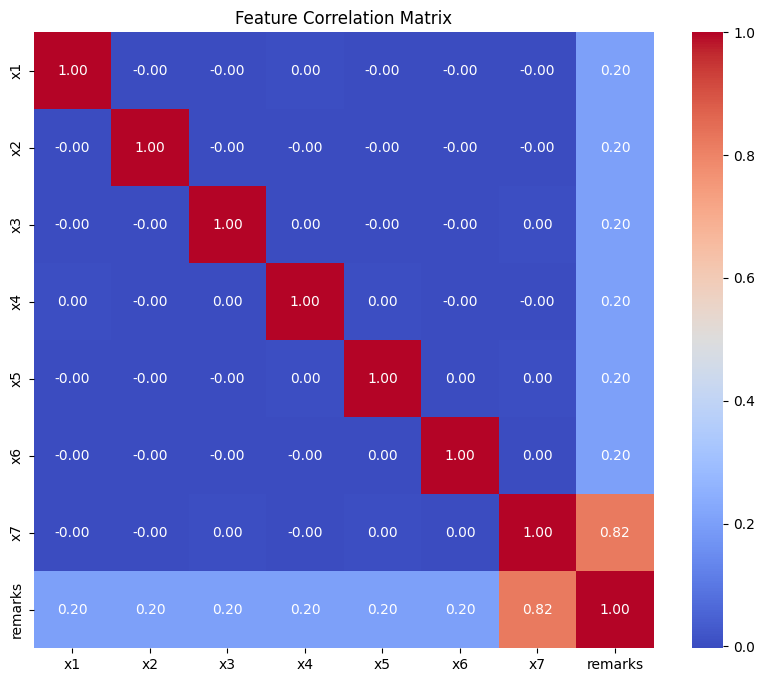

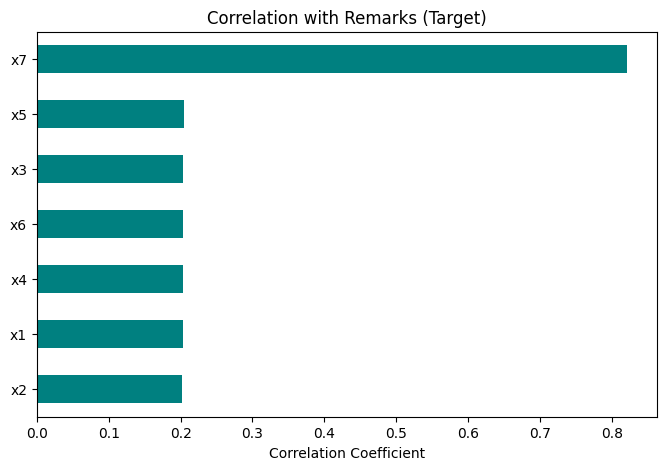

In [4]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Ranked Correlation with Target
plt.figure(figsize=(8, 5))
corr['remarks'].drop('remarks').sort_values().plot(kind='barh', color='teal')
plt.title('Correlation with Remarks (Target)')
plt.xlabel('Correlation Coefficient')
plt.show()

## 4. Feature Distributions by Class (Boxplots & Violin Plots)\nVisualizing how each input differentiates between classes.

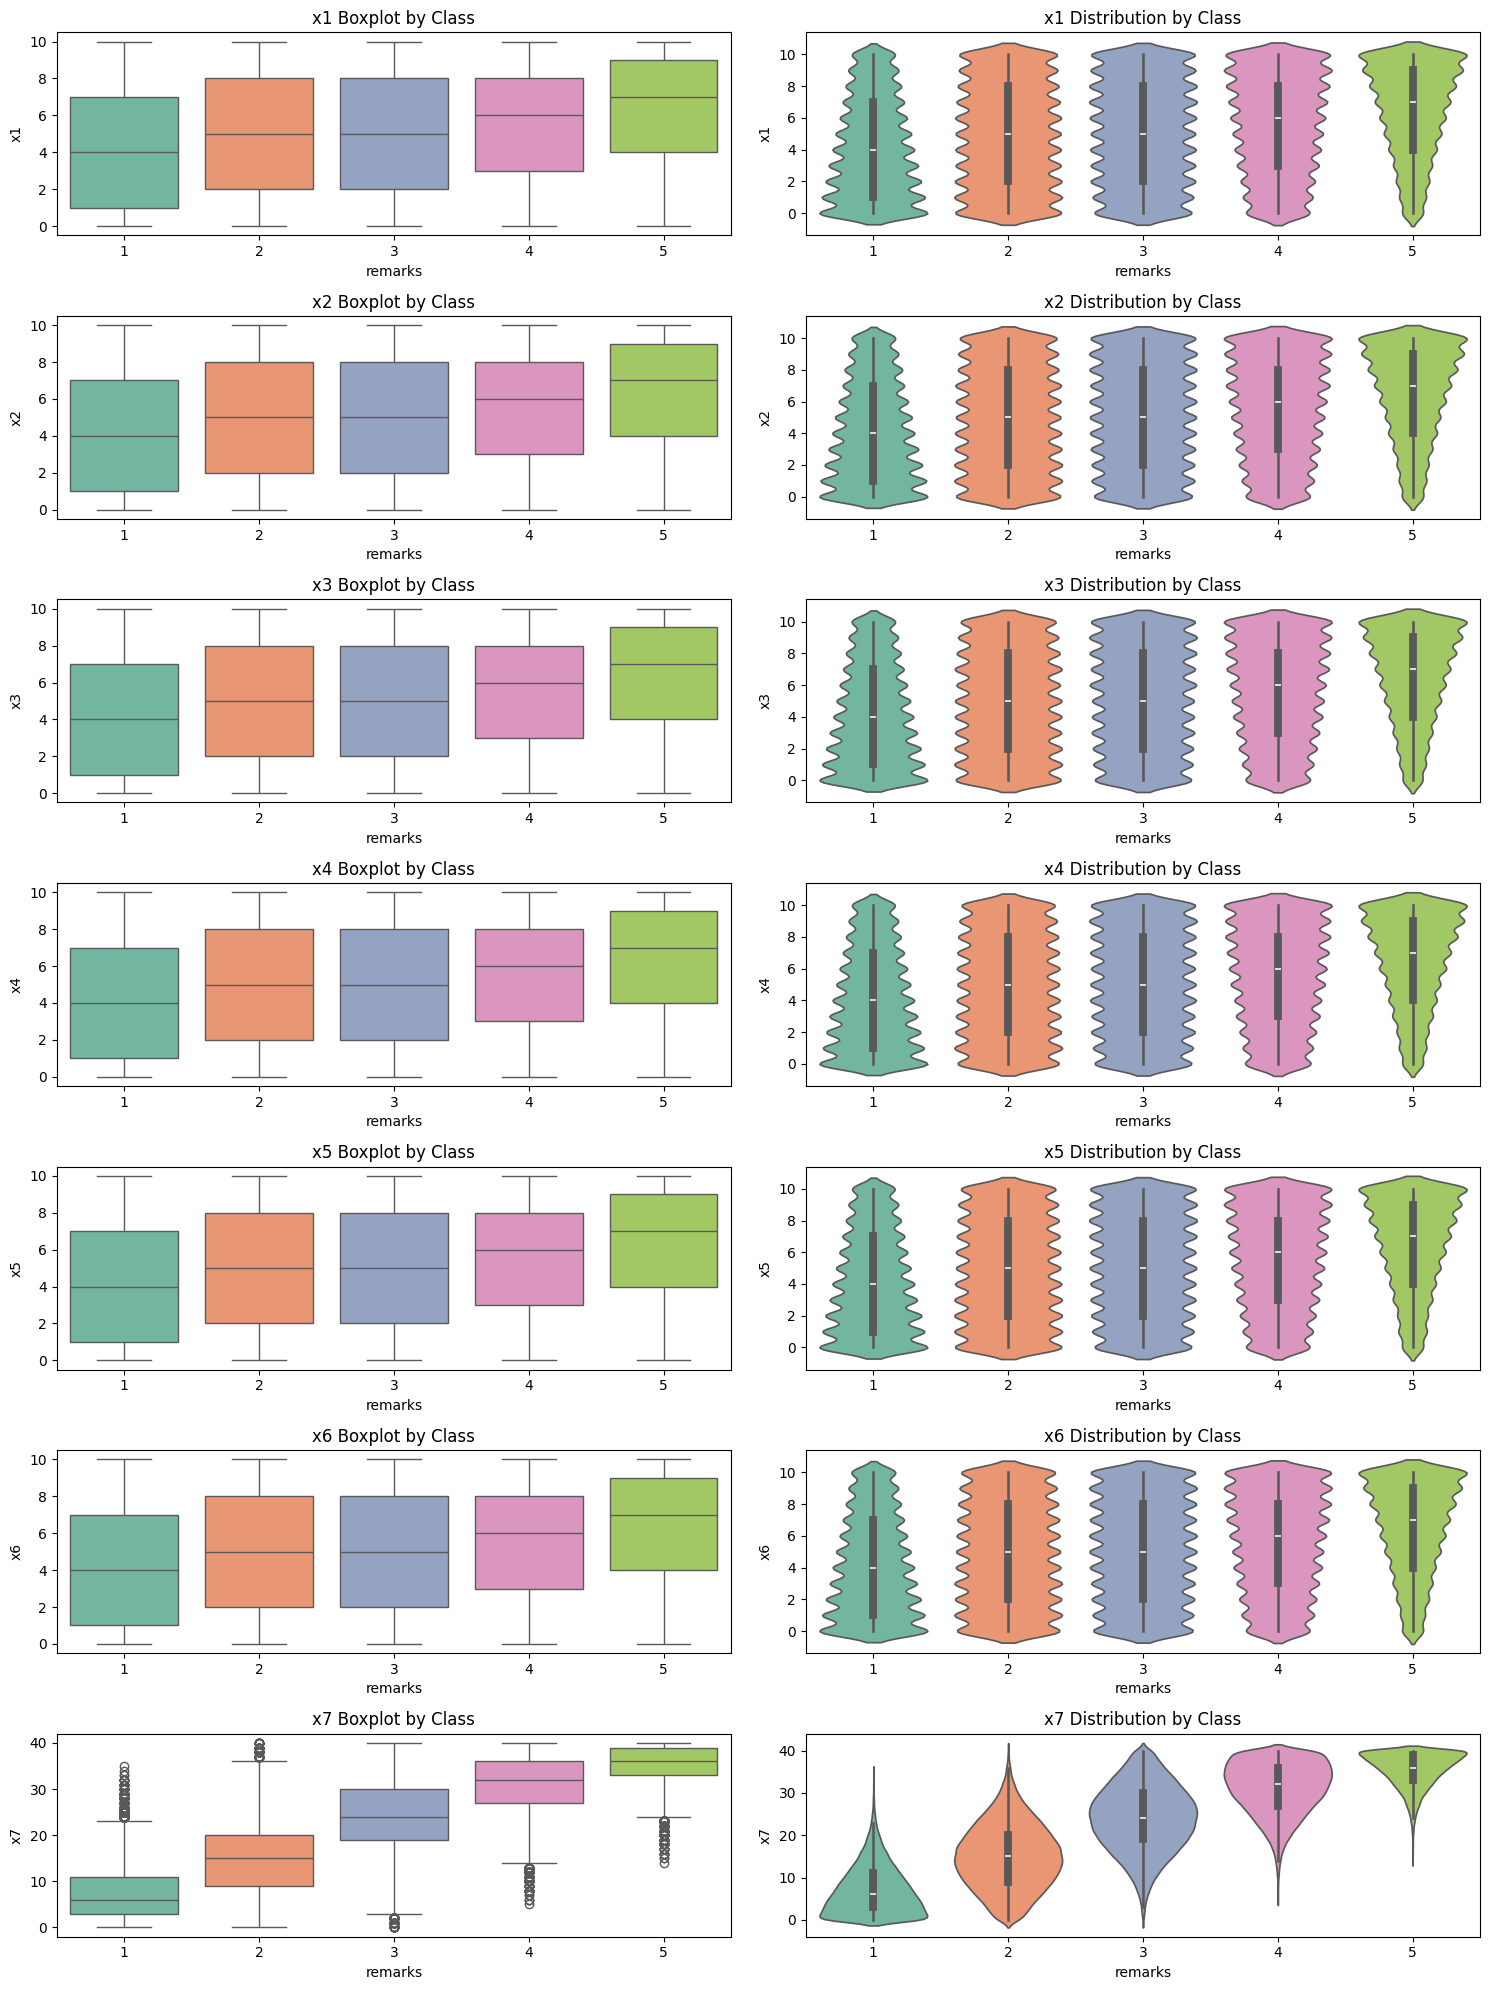

In [5]:
inputs = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
plt.figure(figsize=(15, 20))
plot_idx = 1

for col in inputs:
    if col in df.columns:
        # Boxplot
        plt.subplot(7, 2, plot_idx)
        sns.boxplot(x='remarks', y=col, data=df, hue='remarks', palette='Set2', legend=False)
        plt.title(f'{col} Boxplot by Class')
        plot_idx += 1
        
        # Violin Plot
        plt.subplot(7, 2, plot_idx)
        sns.violinplot(x='remarks', y=col, data=df, hue='remarks', palette='Set2', legend=False)
        plt.title(f'{col} Distribution by Class')
        plot_idx += 1

plt.tight_layout()
plt.show()

## 5. Pairplot Analysis

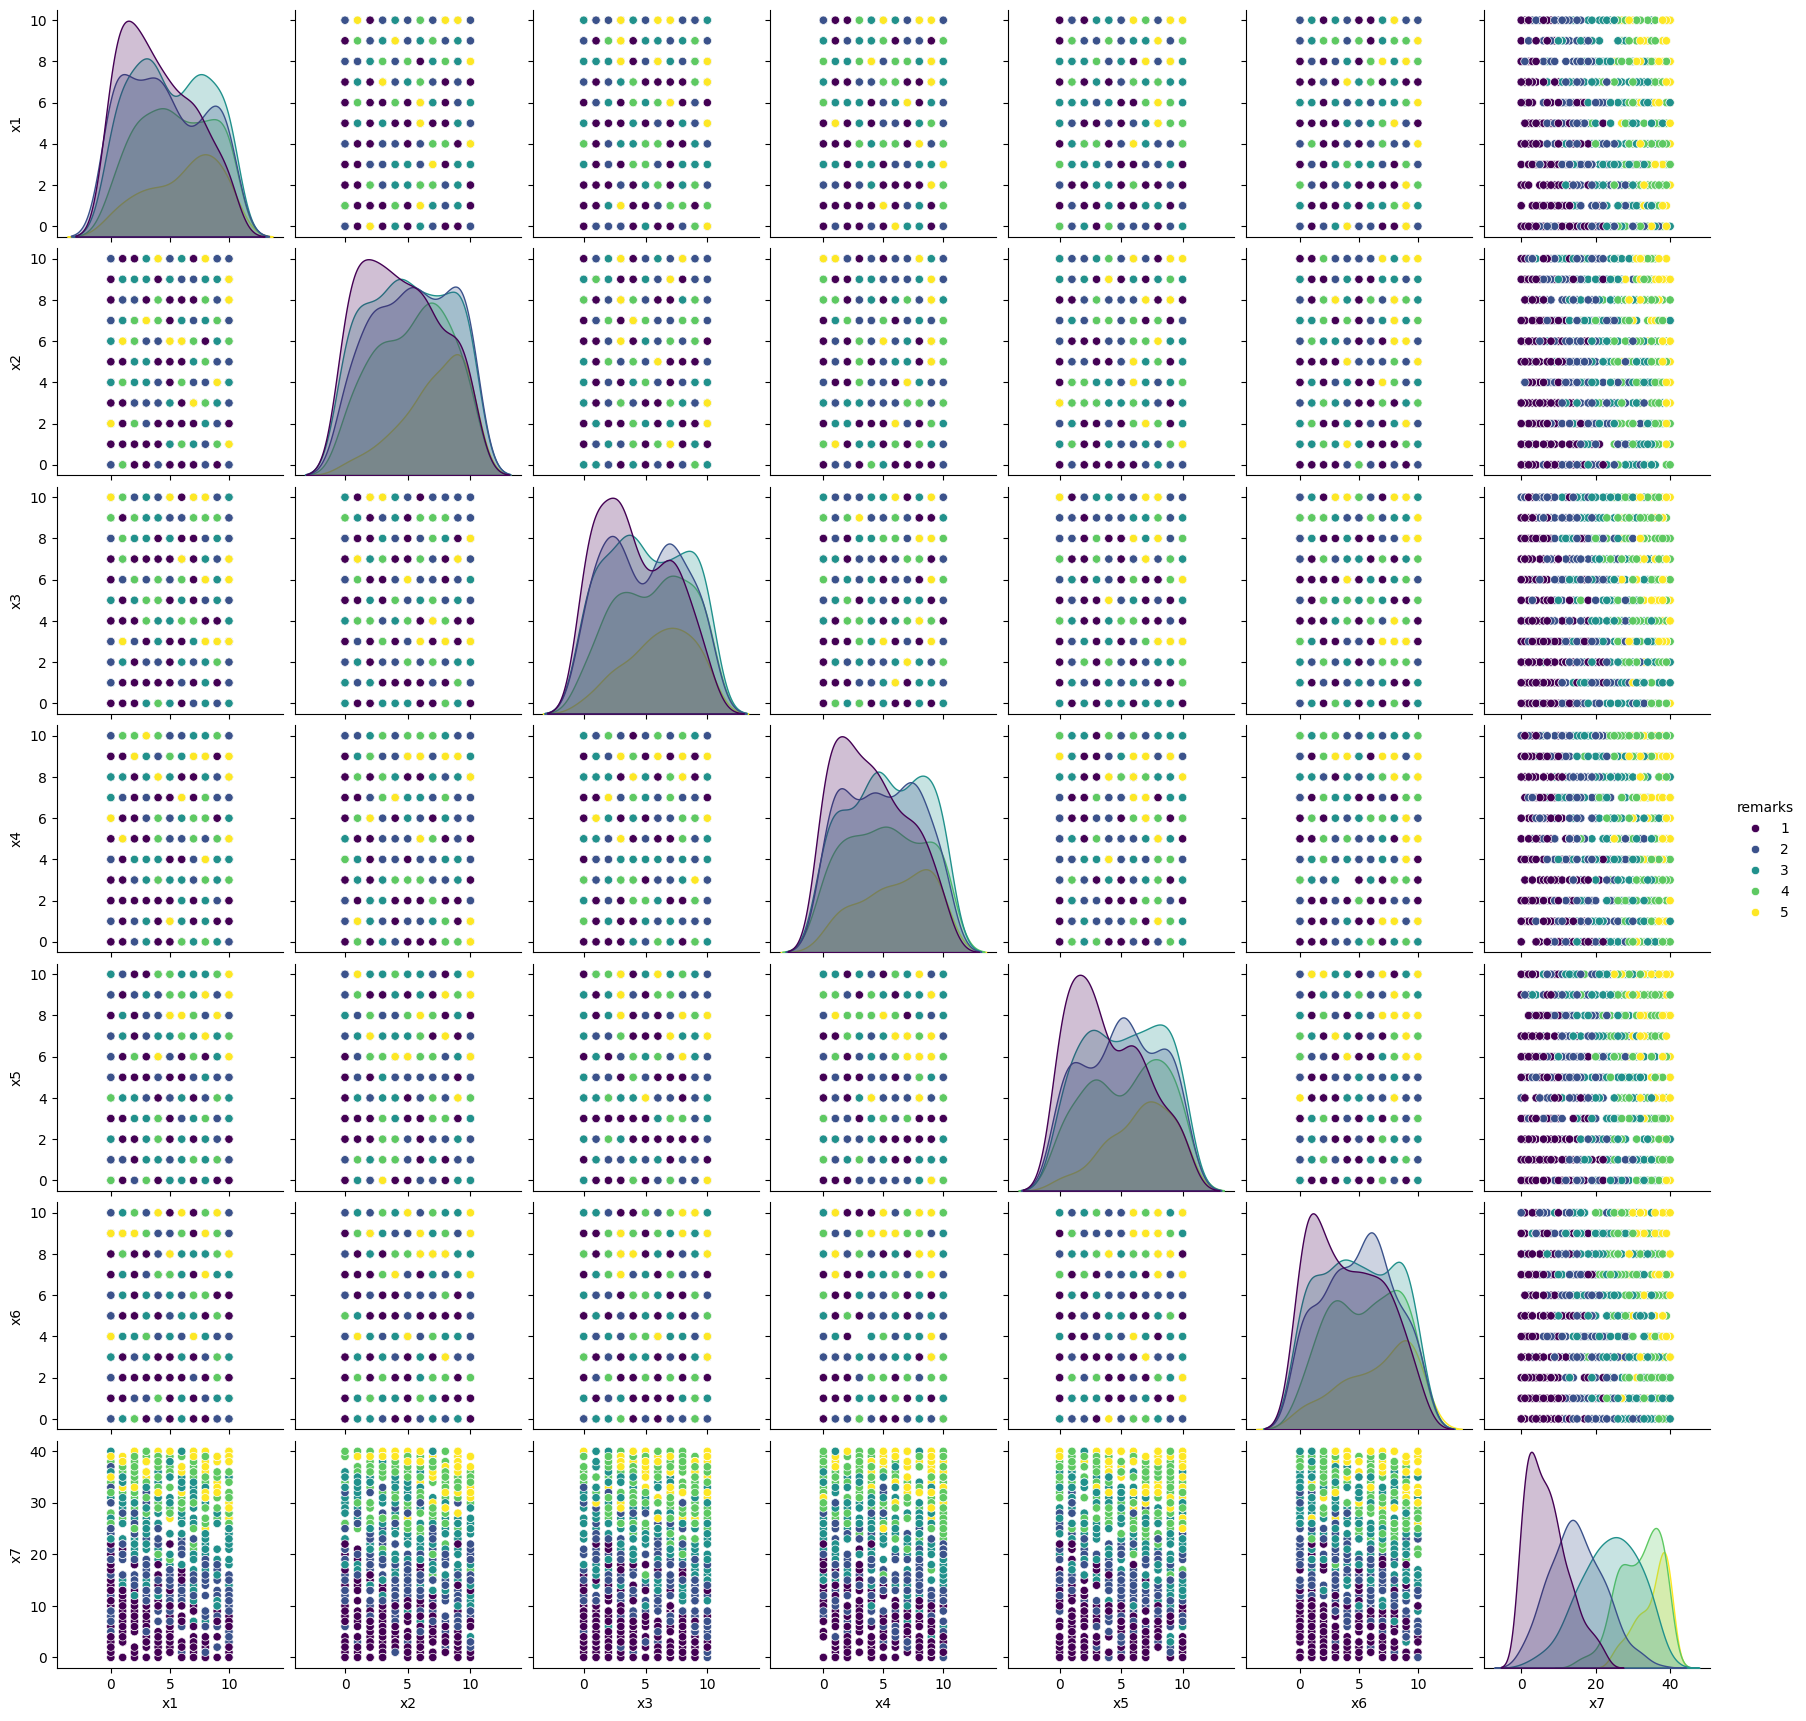

In [6]:
if 'remarks' in df.columns:
    sample_df = df.sample(min(1000, len(df)), random_state=42)
    vars_to_plot = [c for c in ['x1', 'x2', 'x3','x4','x5','x6','x7'] if c in df.columns]
    sns.pairplot(sample_df, hue='remarks', vars=vars_to_plot, palette='viridis')
    plt.show()